# PROJECT: Melbourne Housing Project



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Describe" data-toc-modified-id="Describe-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Describe</a></span></li><li><span><a href="#Examine-and-Exploratory-Data-Analysis" data-toc-modified-id="Examine-and-Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine and Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Areas-have-influence-on-Price?" data-toc-modified-id="Areas-have-influence-on-Price?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Areas have influence on Price?</a></span></li><li><span><a href="#How-is-Price-affected-by-its-Rooms-and-Type?" data-toc-modified-id="How-is-Price-affected-by-its-Rooms-and-Type?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>How is Price affected by its Rooms and Type?</a></span></li><li><span><a href="#What-influence-does-date-have-on-Price?" data-toc-modified-id="What-influence-does-date-have-on-Price?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>What influence does date have on Price?</a></span></li></ul></li><li><span><a href="#Apply-the-model-for-prediction-with-holdout-and-cross-validation." data-toc-modified-id="Apply-the-model-for-prediction-with-holdout-and-cross-validation.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Apply the model for prediction with holdout and cross validation.</a></span></li><li><span><a href="#Using-PCA,-apply-the-model-with-holdout-and-cross-validation." data-toc-modified-id="Using-PCA,-apply-the-model-with-holdout-and-cross-validation.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Using PCA, apply the model with holdout and cross validation.</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

## Introduction


This data set contain information about 34857 information of houses in Melbourne, including price and other information. This dataset is extract from kaggle: https://www.kaggle.com/anthonypino/melbourne-housing-market. In this data set, I'll try to analize the data set and the project should follow the guideline as:

1. Examine and explore data.
2. Apply the model for prediction with holdout and cross validation.
3. Using PCA, apply the model with holdout and cross validation.
4. Visualize the residue and homoscedasticity.
5. Tune the model if necessary.
6. Write up analysis for each section.

## Describe

This dataset have some of the attribute:

    - Suburb: Suburb of Melbourne
    - Address: Address of house
    - Rooms: Number of the rooms of the house
    - Type: Type of house
    - Price: Price of house
    - Method: Method sold
    - SellerG: Name of the seller
    - Date: The day sold
    - Distance: Distance of the house to the center of Melbourne
    - Postcode: Postcode
    - Bedroom2: Number of Bedroom
    - Bathroom: Number of Bathroom
    - Car: Number of Car room 
    - Landsize: Size of the Land
    - BuildingArea: Area of building
    - YearBuilt: The year built
    - CouncilArea: Council of the area
    - Lattitude: Lattitude of the House
    - Longtitude: Longtitude of the House
    - Regionname: Name of the region
    - Propertycount: Propertycount

In [84]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import csv
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import warnings
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

df_house = pd.read_csv('Melbourne_housing_FULL.csv')
df_house = pd.DataFrame(df_house)
display(df_house)

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.0   
1             Biggin   3/12/2016       2.5    3067.0  ...       1.0  1.0   
2             Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       2.0  1.0   
4             Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0   
...              ...         ...       ...       ...  ...       ...  ...   
34852            Jas  24/02/2018       6.3    3013.0  ...       1.0  3.0   
34853        Sweeney  24/02/2018       6.3    3013.0  ...       2.0  1.0   
34854            Jas  24/02/2018       6.3    3013.0  ...       1.0  2.0   
34855  hockingstuart  24/02/2018       6.3    3013.0  ...       NaN  NaN   
34856             RW  24/02/2018       6.3    3013.0  ...       1.0  0.0   

       Landsize  BuildingArea  YearBuilt               CouncilArea Lattitude  \
0         126.0           NaN        NaN        Yarra City Council -37.80140   
1         202.0           NaN        NaN        Yarra City Council -37.79960   
2         156.0          79.0     1900.0        Yarra City Council -37.80790   
3           0.0           NaN        NaN        Yarra City Council -37.81140   
4         134.0         150.0     1900.0        Yarra City Council -37.80930   
...         ...           ...        ...                       ...       ...   
34852     593.0           NaN        NaN  Maribyrnong City Council -37.81053   
34853      98.0         104.0     2018.0  Maribyrnong City Council -37.81551   
34854     220.0         120.0     2000.0  Maribyrnong City Council -37.82286   
34855       NaN           NaN        NaN  Maribyrnong City Council       NaN   
34856     250.0         103.0     1930.0  Maribyrnong City Council -37.81810   

       Longtitude             Regionname Propertycount  
0       144.99580  Northern Metropolitan        4019.0  
1       144.99840  Northern Metropolitan        4019.0  
2       144.99340  Northern Metropolitan        4019.0  
3       145.01160  Northern Metropolitan        4019.0  
4       144.99440  Northern Metropolitan        4019.0  
...           ...                    ...           ...  
34852   144.88467   Western Metropolitan        6543.0  
34853   144.88826   Western Metropolitan        6543.0  
34854   144.87856   Western Metropolitan        6543.0  
34855         NaN   Western Metropolitan        6543.0  
34856   144.89351   Western Metropolitan        6543.0  

[34857 rows x 21 columns]

- The data has 34857 house.

In [85]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

- We can see It has seven columns has null as: Price, Bedroom2, Bath room, Car, Landsize, BuildingArea, Year Built, Lattitude, Longtitude.
- I will delete SellerG, Postcode, CouncilArea, Lattitude, Longtitude, Propertycount, BuildingArea, Year Built.

In [86]:
display(df_house[df_house['Price'].isnull()])

Suburb             Address  Rooms Type  Price Method  \
0          Abbotsford       68 Studley St      2    h    NaN     SS   
3          Abbotsford  18/659 Victoria St      3    u    NaN     VB   
7          Abbotsford        16 Maugie St      4    h    NaN     SN   
8          Abbotsford        53 Turner St      2    h    NaN      S   
9          Abbotsford        99 Turner St      2    h    NaN      S   
...               ...                 ...    ...  ...    ...    ...   
34829  West Melbourne    9/11 Anderson St      3    u    NaN      S   
34834   Wheelers Hill        112 Jells Rd      4    h    NaN     PN   
34835   Wheelers Hill          20 Mill Ct      3    h    NaN      S   
34845         Windsor          13 Mary St      4    h    NaN      W   
34850         Wollert    15 Rockgarden Wy      3    h    NaN     SP   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
0             Jellis   3/09/2016       2.5    3067.0  ...       1.0  1.0   
3             Rounds   4/02/2016       2.5    3067.0  ...       2.0  1.0   
7             Nelson   6/08/2016       2.5    3067.0  ...       2.0  2.0   
8             Biggin   6/08/2016       2.5    3067.0  ...       1.0  2.0   
9            Collins   6/08/2016       2.5    3067.0  ...       2.0  1.0   
...              ...         ...       ...       ...  ...       ...  ...   
34829  hockingstuart  24/02/2018       3.1    3003.0  ...       NaN  NaN   
34834      Harcourts  24/02/2018      16.7    3150.0  ...       2.0  2.0   
34835          Barry  24/02/2018      16.7    3150.0  ...       2.0  2.0   
34845         Jellis  24/02/2018       4.6    3181.0  ...       3.0  2.0   
34850             LJ  24/02/2018      25.5    3750.0  ...       2.0  2.0   

       Landsize  BuildingArea  YearBuilt                CouncilArea Lattitude  \
0         126.0           NaN        NaN         Yarra City Council -37.80140   
3           0.0           NaN        NaN         Yarra City Council -37.81140   
7         400.0         220.0     2006.0         Yarra City Council -37.79650   
8         201.0           NaN     1900.0         Yarra City Council -37.79950   
9         202.0           NaN     1900.0         Yarra City Council -37.79960   
...         ...           ...        ...                        ...       ...   
34829       NaN           NaN        NaN     Melbourne City Council       NaN   
34834     714.0           NaN        NaN        Monash City Council -37.90287   
34835     677.0           NaN        NaN        Monash City Council -37.91905   
34845     279.0         237.0     2009.0  Port Phillip City Council -37.85418   
34850     268.0         135.0     2016.0    Whittlesea City Council -37.61094   

       Longtitude                  Regionname Propertycount  
0       144.99580       Northern Metropolitan        4019.0  
3       145.01160       Northern Metropolitan        4019.0  
7       144.99650       Northern Metropolitan        4019.0  
8       144.99740       Northern Metropolitan        4019.0  
9       144.99890       Northern Metropolitan        4019.0  
...           ...                         ...           ...  
34829         NaN       Northern Metropolitan        2230.0  
34834   145.19011  South-Eastern Metropolitan        7392.0  
34835   145.19105  South-Eastern Metropolitan        7392.0  
34845   144.99697       Southern Metropolitan        4380.0  
34850   145.04281       Northern Metropolitan        2940.0  

[7610 rows x 21 columns]

- The data has 7610 house with null price.
- Price are null because of the following reasons:
    + The Method sold is PN, SN, SS
    + The seller did not disclosed.

In [87]:
df_house.replace(['h', 'u', 't']
                ,['Bungalow', 'Apartment', 'Townhouse'],inplace=True)
df_house.drop(['SellerG','Lattitude','Longtitude','CouncilArea','Propertycount','BuildingArea','YearBuilt','Postcode'], axis=1,inplace=True)

In [88]:
df_house = df_house[df_house['Price'].notnull()]
display(df_house)

Suburb           Address  Rooms       Type      Price Method  \
1      Abbotsford      85 Turner St      2   Bungalow  1480000.0      S   
2      Abbotsford   25 Bloomburg St      2   Bungalow  1035000.0      S   
4      Abbotsford      5 Charles St      3   Bungalow  1465000.0     SP   
5      Abbotsford  40 Federation La      3   Bungalow   850000.0     PI   
6      Abbotsford       55a Park St      4   Bungalow  1600000.0     VB   
...           ...               ...    ...        ...        ...    ...   
34852  Yarraville       13 Burns St      4   Bungalow  1480000.0     PI   
34853  Yarraville     29A Murray St      2   Bungalow   888000.0     SP   
34854  Yarraville    147A Severn St      2  Townhouse   705000.0      S   
34855  Yarraville  12/37 Stephen St      3   Bungalow  1140000.0     SP   
34856  Yarraville  3 Tarrengower St      2   Bungalow  1020000.0     PI   

             Date  Distance  Bedroom2  Bathroom  Car  Landsize  \
1       3/12/2016       2.5       2.0       1.0  1.0     202.0   
2       4/02/2016       2.5       2.0       1.0  0.0     156.0   
4       4/03/2017       2.5       3.0       2.0  0.0     134.0   
5       4/03/2017       2.5       3.0       2.0  1.0      94.0   
6       4/06/2016       2.5       3.0       1.0  2.0     120.0   
...           ...       ...       ...       ...  ...       ...   
34852  24/02/2018       6.3       4.0       1.0  3.0     593.0   
34853  24/02/2018       6.3       2.0       2.0  1.0      98.0   
34854  24/02/2018       6.3       2.0       1.0  2.0     220.0   
34855  24/02/2018       6.3       NaN       NaN  NaN       NaN   
34856  24/02/2018       6.3       2.0       1.0  0.0     250.0   

                  Regionname  
1      Northern Metropolitan  
2      Northern Metropolitan  
4      Northern Metropolitan  
5      Northern Metropolitan  
6      Northern Metropolitan  
...                      ...  
34852   Western Metropolitan  
34853   Western Metropolitan  
34854   Western Metropolitan  
34855   Western Metropolitan  
34856   Western Metropolitan  

[27247 rows x 13 columns]

- Now, this data have 27247 house have price

## Examine and Exploratory Data Analysis

In [89]:
data = df_house.corr()

<AxesSubplot:>

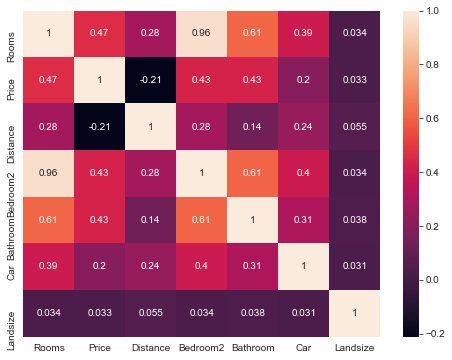

In [90]:
plt.figure(figsize=[8,6])
sns.heatmap(data,annot=True)

- This is the Correlation Matrix

### Areas have influence on Price?

In [91]:
df = df_house[['Suburb','Regionname','Price']]
display(df)

Suburb             Regionname      Price
1      Abbotsford  Northern Metropolitan  1480000.0
2      Abbotsford  Northern Metropolitan  1035000.0
4      Abbotsford  Northern Metropolitan  1465000.0
5      Abbotsford  Northern Metropolitan   850000.0
6      Abbotsford  Northern Metropolitan  1600000.0
...           ...                    ...        ...
34852  Yarraville   Western Metropolitan  1480000.0
34853  Yarraville   Western Metropolitan   888000.0
34854  Yarraville   Western Metropolitan   705000.0
34855  Yarraville   Western Metropolitan  1140000.0
34856  Yarraville   Western Metropolitan  1020000.0

[27247 rows x 3 columns]

In [92]:
df['number of house']=1
df_1 = df.groupby('Regionname').sum()
df_1 = df_1[df_1['number of house']>30]
display(df_1)
#fig = px.bar(df, x='production_countries', y='sum revenue',title="Countries and Sum Revenue")
#fig.show()

Price  number of house
Regionname                                               
Eastern Metropolitan        3.627742e+09             3272
Eastern Victoria            1.185785e+08              166
Northern Metropolitan       6.774711e+09             7864
Northern Victoria           1.027625e+08              166
South-Eastern Metropolitan  1.176972e+09             1341
Southern Metropolitan       1.189889e+10             8524
Western Metropolitan        4.870733e+09             5815
Western Victoria            4.153025e+07               96

- I have 8 region in Melbourne with least of 30 house.

In [93]:
fig = px.bar(df, x='Price', y='Regionname',orientation='h',title="Region and Price")
fig.show()

<AxesSubplot:xlabel='Regionname', ylabel='Price'>

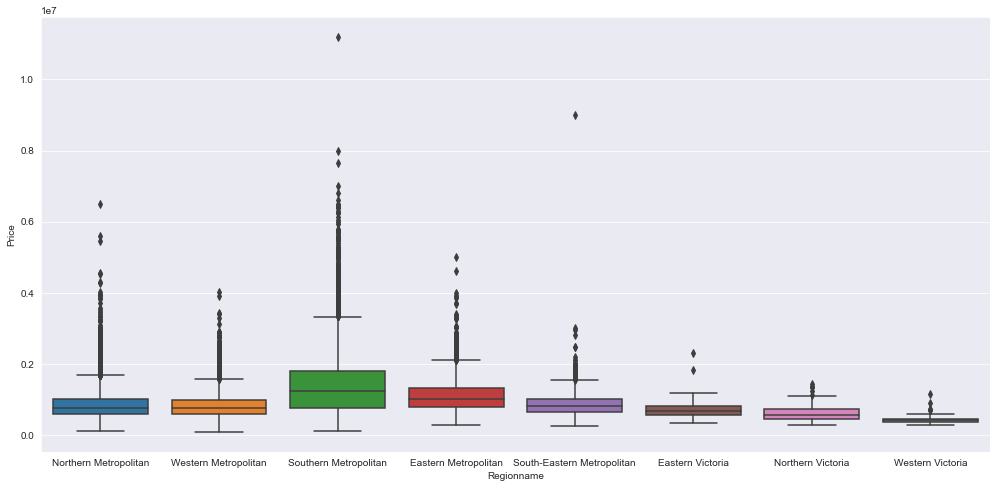

In [94]:
sns.set_style('darkgrid')

plt.figure(figsize=[17,8])
sns.boxplot(data = df_house, x = 'Regionname', y = 'Price')

- We can see the region have the most price is Southern Metropolitan and the least price is Western Victoria
- The question for us: Areas have influence on revenue?
- I choose:
    + H0: Different regions have equal price.
    + H1: Different regions don't have equal price.

In [95]:
model=ols('Price ~ Regionname', data=df).fit()
print(sm.stats.anova_lm(model, typ=2))

                  sum_sq       df           F  PR(>F)
Regionname  1.699035e+15      7.0  695.000212     0.0
Residual    9.511797e+15  27236.0         NaN     NaN


- With p<0.05 we reject H0 and accept H1:Different regions don't have equal price.

### How is Price affected by its Rooms and Type?

In [96]:
df = df_house[['Rooms','Type','Price']]
display(df)
df['Type'].value_counts()

Rooms       Type      Price
1          2   Bungalow  1480000.0
2          2   Bungalow  1035000.0
4          3   Bungalow  1465000.0
5          3   Bungalow   850000.0
6          4   Bungalow  1600000.0
...      ...        ...        ...
34852      4   Bungalow  1480000.0
34853      2   Bungalow   888000.0
34854      2  Townhouse   705000.0
34855      3   Bungalow  1140000.0
34856      2   Bungalow  1020000.0

[27247 rows x 3 columns]

Bungalow     18472
Apartment     5909
Townhouse     2866
Name: Type, dtype: int64

- We have 18472 Bungalow, 5909 Apartment, 2866 Townhouse. 

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

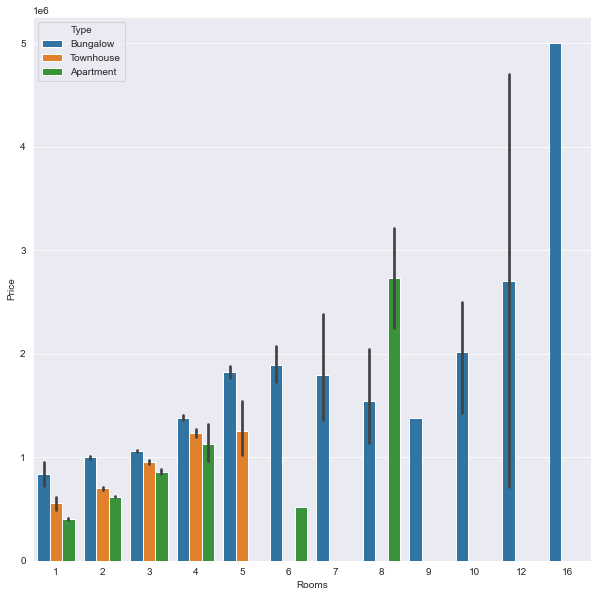

In [97]:
plt.figure(figsize=[10,10])
sns.barplot(x="Rooms",y="Price",data=df,hue="Type")

- We can see: 
    + The house have alot of room will expensive than the other
    + The apartment will cheapper than the other.
    + The Bungalow will more expensive than the other

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

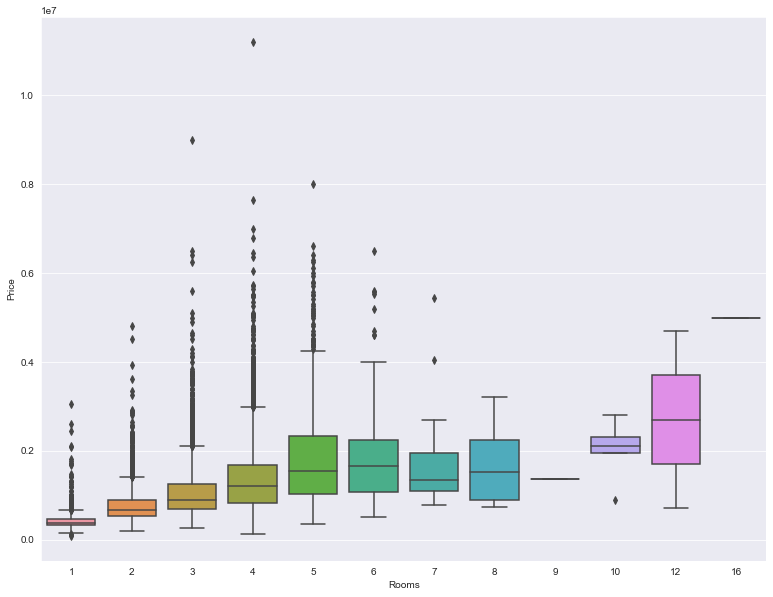

In [98]:
plt.figure(figsize=[13,10])
sns.boxplot(x = 'Rooms', y = 'Price', data = df_house)

- The house has 4 to 6 room will easy to sell.
- The question for us: How is Price affected by its Rooms?
- I choose:
    + H0: Different rooms have equal price.
    + H1: Different rooms don't have equal price.

In [99]:
model=ols('Price ~ Rooms', data=df[df['Rooms'].notnull()]).fit()
print(sm.stats.anova_lm(model, typ=2))

                sum_sq       df            F  PR(>F)
Rooms     2.426624e+15      1.0  7526.087835     0.0
Residual  8.784562e+15  27245.0          NaN     NaN


- With p<0.05 we reject H0 and accept H1:Different rooms don't have equal price.

<AxesSubplot:xlabel='Type', ylabel='Price'>

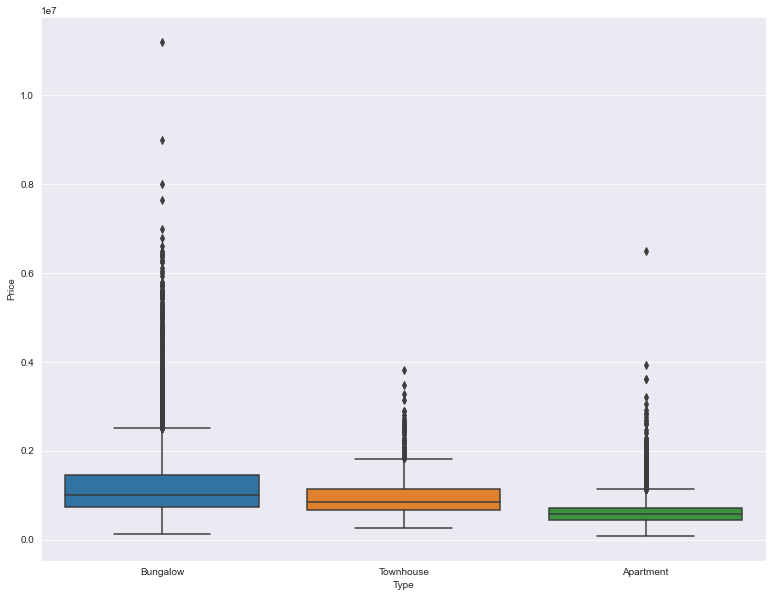

In [100]:
plt.figure(figsize=[13,10])
sns.boxplot(x = 'Type', y = 'Price', data = df_house)

- We can see Bungalow has the highest price and Apartment is the lowest price.
- The question for us:  How is a movie’s price affected by its type?
- I choose:
      + H0: Different type have equal price.
      + H1: Different type don't have equal price.

In [101]:
model=ols('Price ~ Type', data=df[df['Type'].notnull()]).fit()
print(sm.stats.anova_lm(model, typ=2))

                sum_sq       df            F  PR(>F)
Type      1.529594e+15      2.0  2152.139277     0.0
Residual  9.681592e+15  27244.0          NaN     NaN


- With p<0.05 we reject H0 and accept H1:Different type don't have equal price.

### What influence does date have on Price?

In [102]:
df = pd.DataFrame(df_house[['Date','Price']])
display(df)

fig = px.scatter(df[df['Price']>0], x='Date', y='Price', range_x=['1930-01-01', '2019-12-31'],
                 title="Date and Price")
fig.show()


Date      Price
1       3/12/2016  1480000.0
2       4/02/2016  1035000.0
4       4/03/2017  1465000.0
5       4/03/2017   850000.0
6       4/06/2016  1600000.0
...           ...        ...
34852  24/02/2018  1480000.0
34853  24/02/2018   888000.0
34854  24/02/2018   705000.0
34855  24/02/2018  1140000.0
34856  24/02/2018  1020000.0

[27247 rows x 2 columns]

- The question for us: What influence does release date have on revenue?
- I choose:
      + H0: Different Date have equal price.
      + H1: Different Date don't have equal price.

In [103]:
df_1=ols('Price ~ Date', data=df).fit()
print(sm.stats.anova_lm(df_1, typ=2))

                sum_sq       df         F        PR(>F)
Date      2.423105e+14     77.0  7.794585  6.099899e-81
Residual  1.096888e+16  27169.0       NaN           NaN


- With p<0.05 we reject H0 and accept H1:Different Date don't have equal price.

## Apply the model for prediction with holdout and cross validation.

- Holdout

In [104]:
missing_val_count_by_column = (df_house.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Distance         1
Bedroom2      6441
Bathroom      6447
Car           6824
Landsize      9265
Regionname       3
dtype: int64


In [105]:
data1 = df_house.dropna(subset=['Car','Landsize'])
display(data1)

Suburb           Address  Rooms       Type      Price Method  \
1      Abbotsford      85 Turner St      2   Bungalow  1480000.0      S   
2      Abbotsford   25 Bloomburg St      2   Bungalow  1035000.0      S   
4      Abbotsford      5 Charles St      3   Bungalow  1465000.0     SP   
5      Abbotsford  40 Federation La      3   Bungalow   850000.0     PI   
6      Abbotsford       55a Park St      4   Bungalow  1600000.0     VB   
...           ...               ...    ...        ...        ...    ...   
34849     Wollert   35 Kingscote Wy      3   Bungalow   570000.0     SP   
34852  Yarraville       13 Burns St      4   Bungalow  1480000.0     PI   
34853  Yarraville     29A Murray St      2   Bungalow   888000.0     SP   
34854  Yarraville    147A Severn St      2  Townhouse   705000.0      S   
34856  Yarraville  3 Tarrengower St      2   Bungalow  1020000.0     PI   

             Date  Distance  Bedroom2  Bathroom  Car  Landsize  \
1       3/12/2016       2.5       2.0       1.0  1.0     202.0   
2       4/02/2016       2.5       2.0       1.0  0.0     156.0   
4       4/03/2017       2.5       3.0       2.0  0.0     134.0   
5       4/03/2017       2.5       3.0       2.0  1.0      94.0   
6       4/06/2016       2.5       3.0       1.0  2.0     120.0   
...           ...       ...       ...       ...  ...       ...   
34849  24/02/2018      25.5       3.0       2.0  2.0     404.0   
34852  24/02/2018       6.3       4.0       1.0  3.0     593.0   
34853  24/02/2018       6.3       2.0       2.0  1.0      98.0   
34854  24/02/2018       6.3       2.0       1.0  2.0     220.0   
34856  24/02/2018       6.3       2.0       1.0  0.0     250.0   

                  Regionname  
1      Northern Metropolitan  
2      Northern Metropolitan  
4      Northern Metropolitan  
5      Northern Metropolitan  
6      Northern Metropolitan  
...                      ...  
34849  Northern Metropolitan  
34852   Western Metropolitan  
34853   Western Metropolitan  
34854   Western Metropolitan  
34856   Western Metropolitan  

[17701 rows x 13 columns]

In [106]:
data2 = pd.get_dummies(data1)

In [107]:
X= data2[['Rooms','Car','Landsize','Distance', 'Bedroom2', 'Bathroom']]
y= data2['Price']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=512)
lm =LinearRegression(normalize=False,n_jobs=-1)
lm.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [109]:
print(lm.intercept_)

264299.4505719205


In [110]:
lm.coef_

array([ 2.47871835e+05,  5.14165279e+04,  4.64426670e+00, -3.79514618e+04,
        2.57321918e+04,  2.08900785e+05])

In [111]:
prediction = lm.predict(X_test)
prediction

array([1083291.8263405 , 2015994.33301888, 1119694.92039461, ...,
        923855.6726014 ,  527941.88795366, 1026283.06336831])

In [112]:
y_test.head()

18158    2500000.0
4735     2400000.0
29567    1500000.0
1935     2030000.0
620      1710000.0
Name: Price, dtype: float64

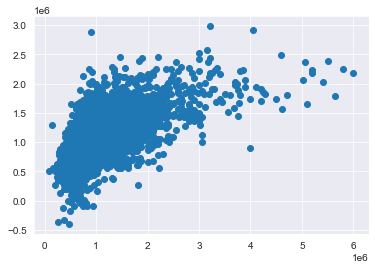

In [113]:
plt.scatter(y_test,prediction)

<AxesSubplot:xlabel='Price', ylabel='Density'>

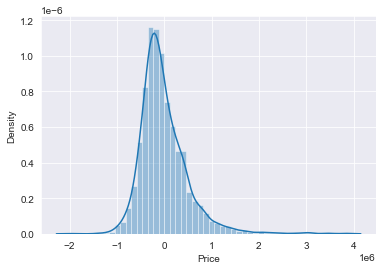

In [114]:
sns.distplot(y_test-prediction)

In [115]:
prediction_1 = lm.predict(X_train)
prediction_1

array([1031298.95685945,  502199.38846917, 1000770.04243282, ...,
       1361896.2722921 , 1099881.49349619,  707982.29632762])

In [116]:
y_train.head()

32106    1755000.0
14872     350000.0
20247     713500.0
28731     825000.0
12898     935000.0
Name: Price, dtype: float64

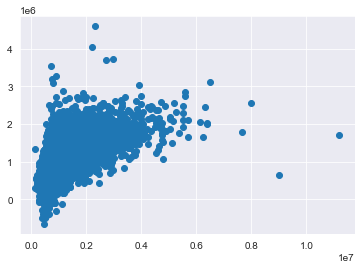

In [117]:
plt.scatter(y_train,prediction_1)

<AxesSubplot:xlabel='Price', ylabel='Density'>

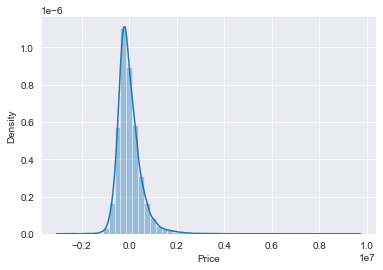

In [118]:
sns.distplot(y_train-prediction_1)

- Cross Validation

In [119]:
model_CV = linear_model.LinearRegression()

In [120]:
B_score = []
cv = []

for i in range(2, 7):
    model = Ridge(alpha=0, normalize=True)
    score = cross_val_score(model, X_train, y_train, cv=i).mean()
    B_score.append(score)
    cv.append(i)
    
    print("cv: %d --- score: %2.4f" % (i, score))
    
px.line(x=cv, y=B_score, 
        template='simple_white', 
        title='<b>K-fold vs R2</b>',
        labels={'x':'K-fold', 'y':'R2'})

cv: 2 --- score: 0.3659
cv: 3 --- score: 0.3658
cv: 4 --- score: 0.3707
cv: 5 --- score: 0.3700
cv: 6 --- score: 0.3613


## Using PCA, apply the model with holdout and cross validation.

- Holdout

In [121]:
C = Pipeline([
                ('PCA', PCA(n_components=6)),
                ('Linear Regression', Ridge(alpha=0, normalize=True))])
C.fit(X_train, y_train)
prediction = lm.predict(X_test)
C.score(X_test, y_test)

0.39152897923642915

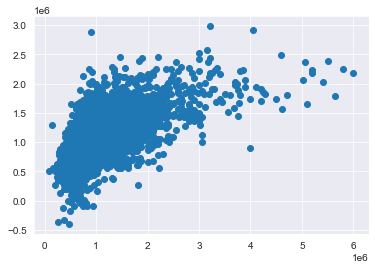

In [122]:
plt.scatter(y_test,prediction)

<AxesSubplot:xlabel='Price', ylabel='Density'>

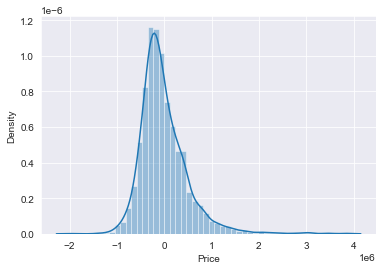

In [123]:
sns.distplot(y_test-prediction)

- Cross Validation

In [124]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

step = [( 'PCA'     , PCA()   ),
        ( 'Lin_Reg' , RidgeCV(alphas=[0], cv=6) )]

D = Pipeline(step)
D.fit(X_train, y_train)
score = D.score(X_test, y_test)
print("D's score: %2.4f" % score)

D's score: 0.3915


## Conclusions

- Regions, number of room, type and date also influent to the price house.
- Model is not so good from the start so the score is not good whatsoever.
- Need to remove more outliers so the model could be better.